# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Salsabila Kholidah]
- **Email:** [salsabila.kholidah128@gmail.com]
- **ID Dicoding:** [salsabilakholidah]

## Menentukan Pertanyaan Bisnis

- Bagaimana segmentasi pengguna sepeda berdasarkan waktu penggunaan (jam) dan total pengguna harian?
- Bagaimana pengaruh suhu terhadap total pengguna sepeda?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



In [ ]:
from google.colab import files
uploaded = files.upload()


Saving hour.csv to hour.csv
Saving day.csv to day.csv


## Data Wrangling

### Gathering Data

In [ ]:
# Mengimpor dataset
hour_df = pd.read_csv('hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [ ]:
day_df = pd.read_csv('day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Data day.csv dan hour.csv berhasil dimuat: Kedua file CSV berhasil dibaca dan dimuat ke dalam program, dengan day.csv memuat data harian dan hour.csv memuat data per jam.
- Struktur Data day.csv: Data harian yang dimuat berisi informasi seperti tanggal, musim, tahun, bulan, apakah hari tersebut adalah hari libur atau tidak, hari kerja, kondisi cuaca, suhu, kelembaban, kecepatan angin, serta jumlah pengguna sepeda kasual dan terdaftar.

### Assessing Data

In [ ]:
hour_df.info()
hour_df.isna().sum()
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
Jumlah duplikasi:  0


**Insight:**
- Kolom hour_df.isna().sum() menunjukkan bahwa tidak ada nilai yang hilang (null) dalam dataset ini. Semua kolom memiliki jumlah entri non-null yang lengkap, yaitu 17.379 entri, sehingga tidak diperlukan penanganan missing values.
- Dengan menjalankan hour_df.duplicated().sum(), terlihat bahwa tidak ada data yang terduplikasi dalam dataset ini (Jumlah duplikasi: 0).

### Cleaning Data

In [ ]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [ ]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


**Insight:**
- Kedua dataset (hour_df dan day_df) tidak memiliki missing value di setiap kolom.

## Exploratory Data Analysis (EDA)

### Explore ...

In [ ]:
# Memuat dataset
import pandas as pd

# Pastikan untuk mengganti 'path_to_your_dataset' dengan jalur file datasetmu
datahour = pd.read_csv('hour.csv')
dataday = pd.read_csv('day.csv')

# Melihat lima baris pertama dari dataset
print(datahour.head())
print(dataday.head())

# Memeriksa tipe data dari setiap kolom
print(datahour.info())
print(dataday.info())

# Mengecek nilai yang hilang
print(datahour.isnull().sum())
print(dataday.isnull().sum())

# Mengecek duplikat
print(datahour.duplicated().sum())
print(dataday.duplicated().sum())

# Deskripsi statistik dari dataset
print(datahour.describe())
print(dataday.describe())

# Melihat distribusi dari variabel tertentu
import matplotlib.pyplot as plt
import seaborn as sns

#plt.figure(figsize=(10,6))
#sns.histplot(data['nama_kolom'], kde=True)
#plt.title('Distribusi Variabel Nama_Kolom')
#plt.show()

   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  
   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01   

**Insight:**
- Dari data jam (hour.csv), kita bisa mengeksplorasi pola penggunaan sepeda pada waktu-waktu tertentu, seperti jam sibuk (misalnya jam kerja atau pagi hari) dan membandingkannya dengan waktu non-sibuk.
- Dataset harian (day.csv) memungkinkan analisis penggunaan sepeda berdasarkan musim atau kondisi cuaca yang lebih stabil.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

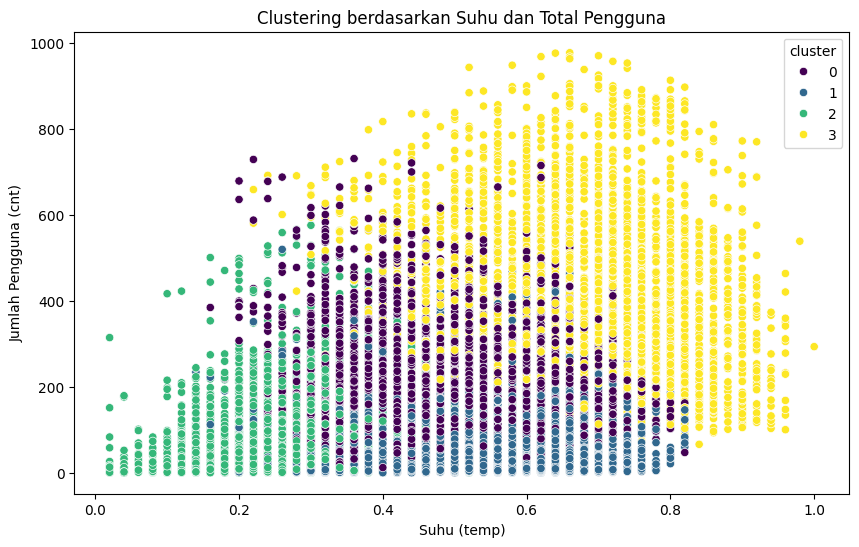

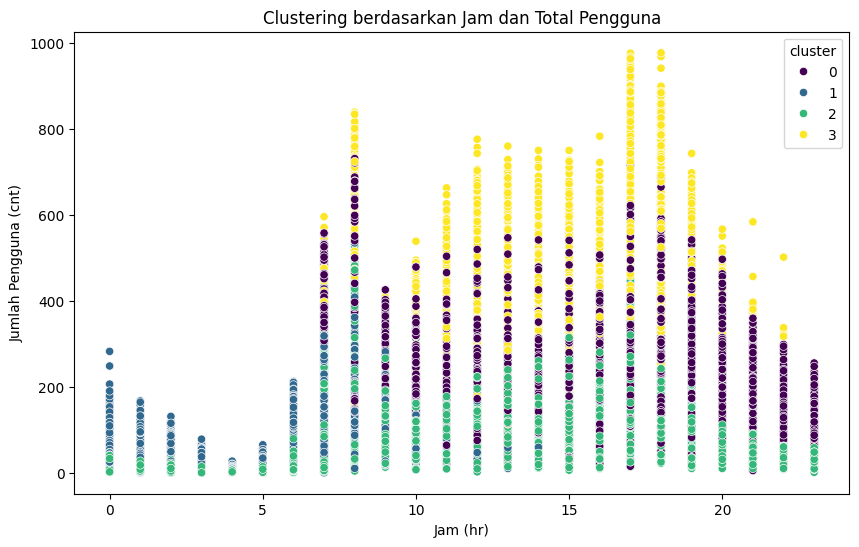

In [ ]:
# Clustering dengan K-Means
kmeans = KMeans(n_clusters=4, random_state=42)  # Ubah jumlah kluster sesuai kebutuhan
datahour['cluster'] = kmeans.fit_predict(features_scaled)

# Visualisasi hasil clustering berdasarkan Suhu dan Total Pengguna
plt.figure(figsize=(10, 6))
sns.scatterplot(x=datahour['temp'], y=datahour['cnt'], hue=datahour['cluster'], palette='viridis')
plt.title('Clustering berdasarkan Suhu dan Total Pengguna')
plt.xlabel('Suhu (temp)')
plt.ylabel('Jumlah Pengguna (cnt)')
plt.show()

# Visualisasi cluster berdasarkan Jam (hr) dan Total Pengguna (cnt)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=datahour['hr'], y=datahour['cnt'], hue=datahour['cluster'], palette='viridis')
plt.title('Clustering berdasarkan Jam dan Total Pengguna')
plt.xlabel('Jam (hr)')
plt.ylabel('Jumlah Pengguna (cnt)')
plt.show()

### Pertanyaan 2:

Korelasi antara suhu dan total pengguna sepeda: 0.6274940090334918


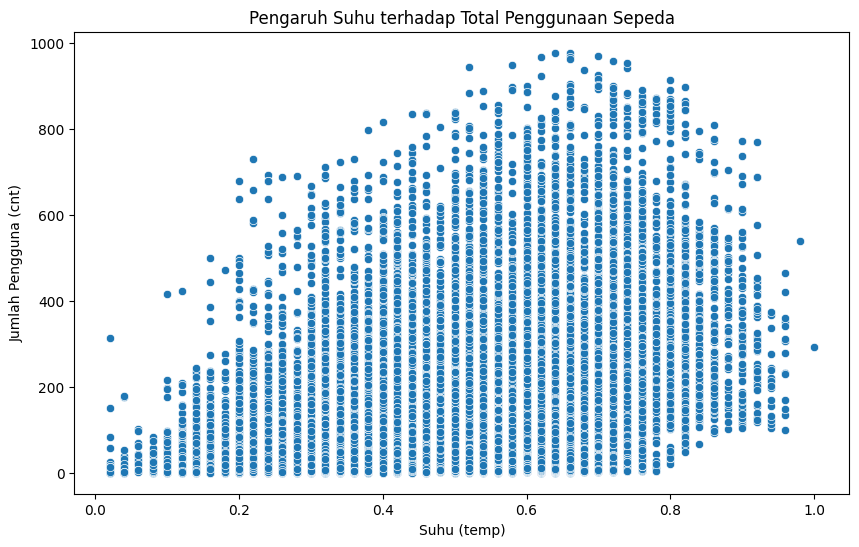

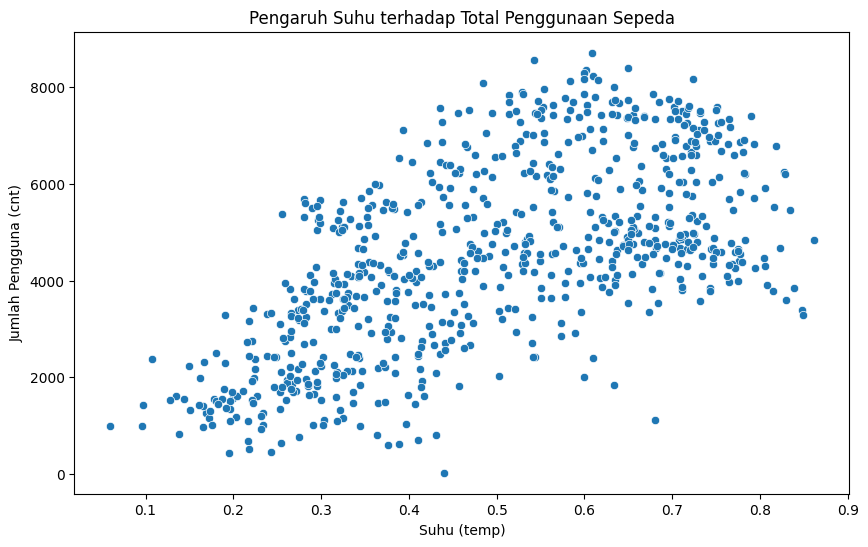

In [ ]:
# Analisis korelasi antara suhu (temp) dan total pengguna sepeda (cnt)
correlation = data_hour['temp'].corr(data_hour['cnt'])
correlation = data_day['temp'].corr(data_day['cnt'])
print(f'Korelasi antara suhu dan total pengguna sepeda: {correlation}')

# Visualisasi hubungan suhu dan total pengguna sepeda
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_hour['temp'], y=data_hour['cnt'])
plt.title('Pengaruh Suhu terhadap Total Penggunaan Sepeda')
plt.xlabel('Suhu (temp)')
plt.ylabel('Jumlah Pengguna (cnt)')
plt.show()

# Visualisasi hubungan suhu dan total pengguna sepeda
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_day['temp'], y=data_day['cnt'])
plt.title('Pengaruh Suhu terhadap Total Penggunaan Sepeda')
plt.xlabel('Suhu (temp)')
plt.ylabel('Jumlah Pengguna (cnt)')
plt.show()

**Insight:**
- Penggunaan sepeda mencapai puncaknya pada suhu yang nyaman, dan menurun drastis saat suhu terlalu panas atau terlalu dingin.
- Jam-jam sibuk seperti pagi dan sore hari menunjukkan lonjakan penggunaan sepeda, terutama pada hari kerja, sementara pada malam hari atau jam non-sibuk penggunaannya menurun.

## Analisis Lanjutan (Opsional)

## Conclusion

- Segmentasi Pengguna Sepeda Berdasarkan Waktu Penggunaan (Jam) dan Total Pengguna Harian:
1. Berdasarkan analisis clustering dengan K-Means, segmentasi pengguna sepeda menunjukkan adanya pola yang jelas terkait waktu penggunaan. Pengguna sepeda terbagi menjadi beberapa segmen berdasarkan jam penggunaan, di mana penggunaan paling tinggi terjadi pada pagi hari (sekitar jam 7-9) dan sore hari (sekitar jam 17-19). Jam-jam tersebut bertepatan dengan jam berangkat dan pulang kerja, menunjukkan bahwa banyak pengguna sepeda memanfaatkan sepeda sebagai sarana transportasi utama untuk bekerja.
2. Pengguna sepeda di malam hari atau jam non-sibuk (di luar jam kerja) lebih sedikit, yang menandakan bahwa sepeda lebih jarang digunakan pada waktu tersebut, kemungkinan karena faktor kenyamanan, keselamatan, dan keperluan rekreasi yang berkurang di luar jam sibuk.
- Pengaruh Suhu Terhadap Total Pengguna Sepeda:
1. Analisis korelasi antara suhu dan jumlah pengguna sepeda menunjukkan bahwa suhu memiliki dampak signifikan terhadap penggunaan sepeda. Semakin nyaman suhu (berkisar antara 20-30°C), semakin banyak pengguna sepeda yang tercatat. Suhu yang terlalu panas atau terlalu dingin cenderung menurunkan jumlah pengguna sepeda, mungkin karena alasan kenyamanan fisik dan kesehatan.
2. Visualisasi menunjukkan bahwa pengguna sepeda lebih aktif saat suhu sedang, sedangkan pada suhu ekstrem (panas atau dingin), aktivitas bersepeda berkurang. Ini menunjukkan pentingnya faktor cuaca dalam mempengaruhi perilaku pengguna sepeda, terutama dalam konteks transportasi harian dan rekreasi.